# Iphone Resell-value Analysis 
## Importing all dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing scraped data from ebay-terapeak and quick sanity check

In [3]:
raw_data = pd.read_csv('ebay_iphone_prices.csv')
print(raw_data.isnull().sum())

web-scraper-order        0
web-scraper-start-url    0
Listing                  0
Price                    0
Sale_Format              0
Shipping_Cost            0
Shipping_percent         0
Shipping                 0
Total sold               0
Item_Revenue             0
Bids                     0
Date                     0
dtype: int64


In [4]:
print(raw_data.describe().round(2))

          Price  Shipping_Cost  Shipping_percent  Total sold  Item_Revenue
count  81272.00       81272.00          81272.00    81272.00      81272.00
mean     644.26           3.74              0.41        4.90       3784.48
std      358.10           3.91              0.49       49.39      41990.06
min      150.10           0.00              0.00        1.00        150.01
25%      364.63           0.00              0.00        1.00        374.69
50%      573.68           5.51              0.00        1.00        626.21
75%      865.62           5.96              1.00        1.00       1037.38
max     2000.00         430.82              1.00     4923.00    4035679.65


In [5]:
print(raw_data['Date'].value_counts())

Date
11/19/2023    479
11/5/2023     423
11/12/2023    409
12/18/2022    401
12/11/2022    380
             ... 
9/1/2021        1
2/23/2021       1
5/9/2021        1
10/7/2021       1
12/4/2021       1
Name: count, Length: 1053, dtype: int64


In [6]:
print(raw_data['Sale_Format'].value_counts())

Sale_Format
Fixed price    46607
Auction        34665
Name: count, dtype: int64


## Setting up derived columns and doing minor data preparation

In [7]:
raw_data['Model'] = raw_data['web-scraper-start-url'].str.extract(r'aspect=Modell%3A%3A%3A([^&]+)')
raw_data['Model'] = raw_data['Model'].str.replace('+', ' ')

In [8]:
raw_data['Storage'] = raw_data['web-scraper-start-url'].str.extract(r'aspect=Speicherkapazit%C3%A4t%3A%3A%3A([^&]+)')
raw_data['Storage'] = raw_data['Storage'].str.replace('+', ' ')

In [9]:
release_dates = {
    'Apple iPhone 11 Pro Max': '20.09.2019',
    'Apple iPhone 11 Pro': '20.09.2019',
    'Apple iPhone XS': '26.10.2018',
    'Apple iPhone XR': '26.10.2018',
    'Apple iPhone 11': '20.09.2019',
    'Apple iPhone X': '03.11.2017',
    'Apple iPhone 12': '23.10.2020',
    'Apple iPhone 12 Pro': '23.10.2020',
    'Apple iPhone 12 Pro Max': '23.10.2020',
    'Apple iPhone 12 mini': '23.10.2020',
    'Apple iPhone 13 mini': '24.09.2021',
    'Apple iPhone 13 Pro': '24.09.2021',
    'Apple iPhone 13 Pro Max': '24.09.2021',
    'Apple iPhone 13': '24.09.2021',
    'Apple iPhone 14 Pro': '16.09.2022',
    'Apple iPhone 14 Pro Max': '16.09.2022',
    'Apple iPhone 14': '16.09.2022'
}
raw_data['Release_date'] = raw_data['Model'].map(release_dates)

In [10]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'], format='%m/%d/%Y')
raw_data['Release_date'] = pd.to_datetime(raw_data['Release_date'], format='%d.%m.%Y')

In [11]:
release_prices = {
    'Apple iPhone 11 Pro Max 64 GB': 1249,
    'Apple iPhone 11 Pro Max 256 GB': 1419,
    'Apple iPhone 11 Pro Max 512 GB': 1649,

    'Apple iPhone 11 Pro 64 GB': 1149,
    'Apple iPhone 11 Pro 256 GB': 1319,
    'Apple iPhone 11 Pro 512 GB': 1549,

    'Apple iPhone XS 64 GB': 1249,
    'Apple iPhone XS 256 GB': 1419,
    'Apple iPhone XS 512 GB': 1549,

    'Apple iPhone XR 64 GB': 849,
    'Apple iPhone XR 128 GB': 909,
    'Apple iPhone XR 256 GB': 1019,

    'Apple iPhone 11 64 GB': 799,
    'Apple iPhone 11 128 GB': 849,
    'Apple iPhone 11 256 GB': 969,

    'Apple iPhone X 64 GB': 1149,
    'Apple iPhone X 256 GB': 1319,

    'Apple iPhone 12 64 GB': 899,
    'Apple iPhone 12 128 GB': 949,
    'Apple iPhone 12 256 GB': 1069,

    'Apple iPhone 12 Pro 128 GB': 1149,
    'Apple iPhone 12 Pro 256 GB': 1269,
    'Apple iPhone 12 Pro 512 GB': 1499,

    'Apple iPhone 12 Pro Max 128 GB': 1249,
    'Apple iPhone 12 Pro Max 256 GB': 1369,
    'Apple iPhone 12 Pro Max 512 GB': 1599,

    'Apple iPhone 12 mini 64 GB': 799,
    'Apple iPhone 12 mini 128 GB': 849,
    'Apple iPhone 12 mini 256 GB': 969,

    'Apple iPhone 13 mini 128 GB': 799,
    'Apple iPhone 13 mini 256 GB': 919,
    'Apple iPhone 13 mini 512 GB': 1149,

    'Apple iPhone 13 128 GB': 899,
    'Apple iPhone 13 256 GB': 1019,
    'Apple iPhone 13 512 GB': 1249,

    'Apple iPhone 13 Pro 128 GB': 1149,
    'Apple iPhone 13 Pro 256 GB': 1269,
    'Apple iPhone 13 Pro 512 GB': 1499,
    'Apple iPhone 13 Pro 1 TB': 1729,

    'Apple iPhone 13 Pro Max 128 GB': 1249,
    'Apple iPhone 13 Pro Max 256 GB': 1369,
    'Apple iPhone 13 Pro Max 512 GB': 1599,
    'Apple iPhone 13 Pro Max 1 TB': 1829,

    'Apple iPhone 14 128 GB': 999,
    'Apple iPhone 14 256 GB': 1129,
    'Apple iPhone 14 512 GB': 1389,

    'Apple iPhone 14 Pro 128 GB': 1299,
    'Apple iPhone 14 Pro 256 GB': 1429,
    'Apple iPhone 14 Pro 512 GB': 1689,
    'Apple iPhone 14 Pro 1 TB': 1949,

    'Apple iPhone 14 Pro Max 128 GB': 1449,
    'Apple iPhone 14 Pro Max 256 GB': 1579,
    'Apple iPhone 14 Pro Max 512 GB': 1839,
    'Apple iPhone 14 Pro Max 1 TB': 2099
}
raw_data['Combined'] = raw_data['Model'] + " " + raw_data['Storage']
raw_data['release_price'] = raw_data['Combined'].map(release_prices)

In [12]:
raw_data['Storage'].replace('1 TB', '1024 GB', inplace=True)
raw_data['Storage'] = raw_data['Storage'].str.replace(' GB', '', regex=False).astype('int64')

In [13]:
raw_data['Bids'].replace('–', 0, inplace=True)

In [14]:
raw_data['Price_incl_shipping'] = raw_data['Price'] + raw_data['Shipping_Cost']

In [15]:
raw_data['days_since_release'] = (raw_data['Date'] - raw_data['Release_date']).dt.days

## EDA :D

In [16]:
data = raw_data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81272 entries, 0 to 81271
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   web-scraper-order      81272 non-null  object        
 1   web-scraper-start-url  81272 non-null  object        
 2   Listing                81272 non-null  object        
 3   Price                  81272 non-null  float64       
 4   Sale_Format            81272 non-null  object        
 5   Shipping_Cost          81272 non-null  float64       
 6   Shipping_percent       81272 non-null  float64       
 7   Shipping               81272 non-null  object        
 8   Total sold             81272 non-null  int64         
 9   Item_Revenue           81272 non-null  float64       
 10  Bids                   81272 non-null  object        
 11  Date                   81272 non-null  datetime64[ns]
 12  Model                  81272 non-null  object        
 13  S

In [17]:
print(raw_data['Date'].value_counts())

Date
2023-11-19    479
2023-11-05    423
2023-11-12    409
2022-12-18    401
2022-12-11    380
             ... 
2021-09-01      1
2021-02-23      1
2021-05-09      1
2021-10-07      1
2021-12-04      1
Name: count, Length: 1053, dtype: int64


In [18]:
print(raw_data['Model'].value_counts())

Model
Apple iPhone 12            9102
Apple iPhone 12 Pro        6605
Apple iPhone 14 Pro Max    6218
Apple iPhone 14 Pro        5895
Apple iPhone 12 mini       5859
Apple iPhone 13 Pro        5573
Apple iPhone 11 Pro        5516
Apple iPhone XR            5039
Apple iPhone 14            4947
Apple iPhone 13 Pro Max    4752
Apple iPhone 13            4142
Apple iPhone XS            3897
Apple iPhone 12 Pro Max    3875
Apple iPhone 11 Pro Max    3487
Apple iPhone 11            2299
Apple iPhone X             2146
Apple iPhone 13 mini       1920
Name: count, dtype: int64


In [52]:
# Step 1: Filter out observations where Price_incl_shipping is higher than release_price
filtered_data = data[data['Price_incl_shipping'] <= data['release_price']]

# Step 2: Calculate the mean Price_incl_shipping for each unique combination of Model, Storage, and days_since_release
grouped_data = filtered_data.groupby(['Model', 'Storage', 'days_since_release']).agg({'Price_incl_shipping': 'mean'}).reset_index()

# Step 3: Merge the unique release_price with the grouped_data based on both Model and Storage
grouped_data = pd.merge(grouped_data, filtered_data[['Model', 'Storage', 'release_price']].drop_duplicates(), on=['Model', 'Storage'], how='left')


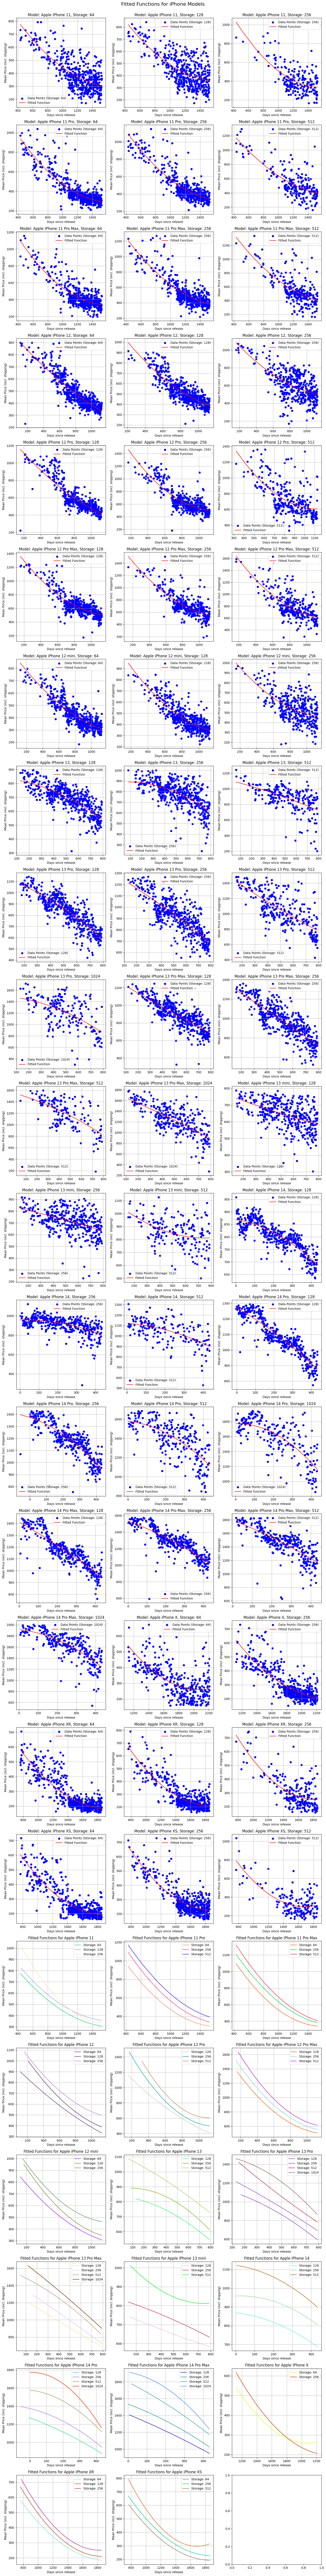

In [75]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def fit_polynomial(x, y, degree=2):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    return polynomial, coefficients

# Get unique combinations of Model and Storage
unique_combinations = grouped_data[['Model', 'Storage']].drop_duplicates()

# Calculate the total number of plots required
total_plots = len(grouped_data['Model'].unique()) + len(unique_combinations)
num_rows = (total_plots + 2) // 3  # To ensure we have enough rows for all plots

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
fig.suptitle('Fitted Functions for iPhone Models', fontsize=16)

# Flatten axs if needed
if total_plots < num_rows * 3:
    axs = axs.flatten()[:total_plots]
else:
    axs = axs.flatten()

# Plotting for each unique combination
for idx, (index, row) in enumerate(unique_combinations.iterrows()):
    model, storage = row['Model'], row['Storage']
    
    subset = grouped_data[(grouped_data['Model'] == model) & (grouped_data['Storage'] == storage)]
    
    # Fit polynomial
    fitted_polynomial, coefficients = fit_polynomial(subset['days_since_release'], subset['Price_incl_shipping'])
    
    # Plotting
    axs[idx].scatter(subset['days_since_release'], subset['Price_incl_shipping'], label=f'Data Points (Storage: {storage})', color='blue')
    axs[idx].plot(subset['days_since_release'], fitted_polynomial(subset['days_since_release']), label='Fitted Function', color='red')
    
    axs[idx].set_xlabel('Days since release')
    axs[idx].set_ylabel('Mean Price (incl. shipping)')
    axs[idx].set_title(f'Model: {model}, Storage: {storage}')
    axs[idx].legend()
    axs[idx].grid(True)

# Plotting for each model
for model_idx, model in enumerate(grouped_data['Model'].unique()):
    current_ax = axs[len(unique_combinations) + model_idx]  # Get the next available axis
    
    current_ax.set_title(f'Fitted Functions for {model}')
    
    storage_colors = {}  # Dictionary to store colors for each unique storage variant
    
    for _, row in unique_combinations.iterrows():
        current_model, storage = row['Model'], row['Storage']
        
        if current_model == model:
            subset = grouped_data[(grouped_data['Model'] == model) & (grouped_data['Storage'] == storage)]
            
            # Fit polynomial
            fitted_polynomial, _ = fit_polynomial(subset['days_since_release'], subset['Price_incl_shipping'])
            
            # Plotting for individual storage variants within the model
            if storage not in storage_colors:
                storage_colors[storage] = np.random.rand(3,)  # Random color for each unique storage variant
                
            current_ax.plot(subset['days_since_release'], fitted_polynomial(subset['days_since_release']), 
                            label=f'Storage: {storage}', color=storage_colors[storage])
    
    current_ax.set_xlabel('Days since release')
    current_ax.set_ylabel('Mean Price (incl. shipping)')
    current_ax.legend()
    current_ax.grid(True)

# Remove any empty subplots
for ax in axs[total_plots:]:
    ax.remove()

plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to fit title
plt.show()

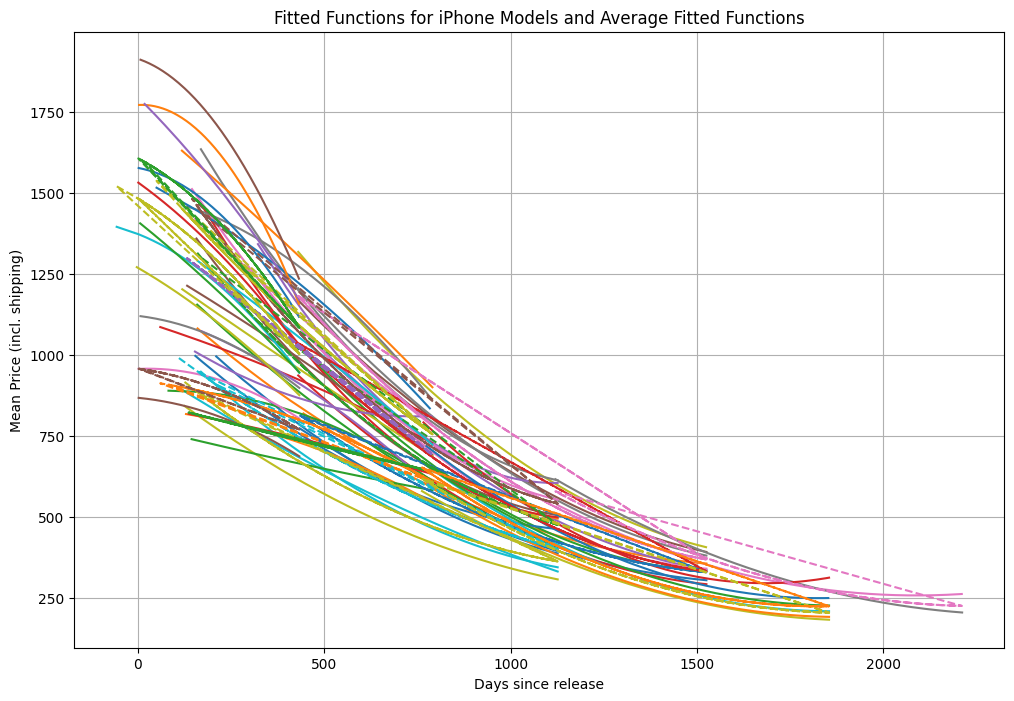

In [76]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def fit_polynomial(x, y, degree=2):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    return polynomial, coefficients

# Get unique combinations of Model and Storage
unique_combinations = grouped_data[['Model', 'Storage']].drop_duplicates()

# Plot for each unique combination and average plot for each model
model_colors = {}  # Dictionary to store colors for each unique model
plt.figure(figsize=(12, 8))

for index, row in unique_combinations.iterrows():
    model, storage = row['Model'], row['Storage']
    
    subset = grouped_data[(grouped_data['Model'] == model) & (grouped_data['Storage'] == storage)]
    
    # Fit polynomial
    fitted_polynomial, _ = fit_polynomial(subset['days_since_release'], subset['Price_incl_shipping'])
    
    # Plotting for individual combinations
    plt.plot(subset['days_since_release'], fitted_polynomial(subset['days_since_release']), label=f'{model} (Storage: {storage})')
    
    # Store color for the model
    if model not in model_colors:
        model_colors[model] = plt.gca().lines[-1].get_color()

# Generate average plots for each model
for model in grouped_data['Model'].unique():
    subset = grouped_data[grouped_data['Model'] == model]
    
    # Fit polynomial on aggregated data for the model
    fitted_polynomial, _ = fit_polynomial(subset['days_since_release'], subset['Price_incl_shipping'])
    
    # Plotting the average fitted function for each model
    plt.plot(subset['days_since_release'], fitted_polynomial(subset['days_since_release']), 
             label=f'Average {model}', color=model_colors[model], linestyle='--')

plt.xlabel('Days since release')
plt.ylabel('Mean Price (incl. shipping)')
plt.title('Fitted Functions for iPhone Models and Average Fitted Functions')
plt.grid(True)

plt.show()


## ready to train some models? :)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop(['Price'], axis= 1)
y = data['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_s, y_train)

In [ ]:
reg.score(X_test_s, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor()

forest1.fit(X_train_s, y_train)

In [ ]:
forest1.score(X_test_s, y_test)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# forest2 = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [300, 500, 1000],
#     'max_features': [6],
#     'min_samples_split': [8, 10, 20]
# }

# grid_search = GridSearchCV(forest2, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# grid_search.fit(X_train_s, y_train)

In [ ]:
# best_forest = grid_search.best_estimator_
# best_forest

In [ ]:
# best_forest.score(X_test_s, y_test)

In [ ]:
predictions = forest1.predict(X=X_test_s)

In [ ]:
columns_pred = [
    'Storage',
    'release_price',
    'Days_since_release',
    'price_class',
    'Condition_defekt',
    'Condition_gebraucht',
    'Condition_gut refurbished',
    'Condition_hervorragend refurbished',
    'Condition_neu',
    'Condition_neu sonstige',
    'Condition_zertifiziert refurbished'
]
predframe = pd.DataFrame(columns=columns_pred)
# defekt, gebraucht, gut refurbished, hervorragend refurbished, neu, neu sonstige, zertifiziert refurbished
predframe.loc[0] = [256, 1269, 800, 2, True, False, False, False, False, False, False]
predframe.loc[1] = [256, 1269, 800, 2, False, True, False, False, False, False, False]
predframe.loc[2] = [256, 1269, 800, 2, False, False, True, False, False, False, False]
predframe.loc[3] = [256, 1269, 800, 2, False, False, False, True, False, False, False]
predframe.loc[4] = [256, 1269, 800, 2, False, False, False, False, True, False, False]
predframe.loc[5] = [256, 1269, 800, 2, False, False, False, False, False, True, False]
predframe.loc[6] = [256, 1269, 800, 2, False, False, False, False, False, False, True]
predframe_s = scaler.transform(predframe)

In [ ]:
forest1.predict(X=predframe_s)